In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
%matplotlib inline
!pip install bioinfokit
import bioinfokit as bio
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics
import plotly.express as px
import plotly
plotly.offline.init_notebook_mode(connected=True)  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
mac=pd.read_csv("/content/mcdonalds.csv")
mac.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [3]:
mac.shape

(1453, 15)

In [4]:
mac.columns.values

array(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast',
       'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like',
       'Age', 'VisitFrequency', 'Gender'], dtype=object)

In [5]:
mac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [6]:
mac.describe(include="all")

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453.000000,1453,1453
unique,2,2,2,2,2,2,2,2,2,2,2,11,NaN,6,2
top,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,+3,NaN,Once a month,Female
freq,803,1319,1317,1260,765,1308,870,936,933,1164,1100,229,NaN,439,788
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.604955,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.221178,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.000000,NaN,NaN


In [7]:
mac.isna().sum()
mac.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [8]:
print(mac.iloc[:, [0, 1, 3, 5, 7, 8, 13]].describe())

       yummy convenient fattening  fast tasty expensive VisitFrequency
count   1453       1453      1453  1453  1453      1453           1453
unique     2          2         2     2     2         2              6
top      Yes        Yes       Yes   Yes   Yes        No   Once a month
freq     803       1319      1260  1308   936       933            439


In [9]:
mac['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [10]:
mac["yummy"]= mac["yummy"].replace({'Yes':1, 'No':0})
mac["convenient"] = mac["convenient"].replace({'Yes':1, 'No':0})
mac["spicy"] = mac["spicy"].replace({'Yes':1, 'No':0})
mac["fattening"] = mac["fattening"].replace({'Yes':1, 'No':0})
mac["greasy"] = mac["greasy"].replace({'Yes':1, 'No':0})
mac["fast"] = mac["fast"].replace({'Yes':1, 'No':0})
mac["cheap"] = mac["cheap"].replace({'Yes':1, 'No':0})
mac["tasty"] = mac["tasty"].replace({'Yes':1, 'No':0})
mac["expensive"] = mac["expensive"].replace({'Yes':1, 'No':0})
mac["healthy"] = mac["healthy"].replace({'Yes':1, 'No':0})
mac["disgusting"] = mac["disgusting"].replace({'Yes':1, 'No':0})
mac['Like']= mac['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})

In [11]:
mac.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [12]:
mac1=mac.iloc[:,0:11]
mac1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


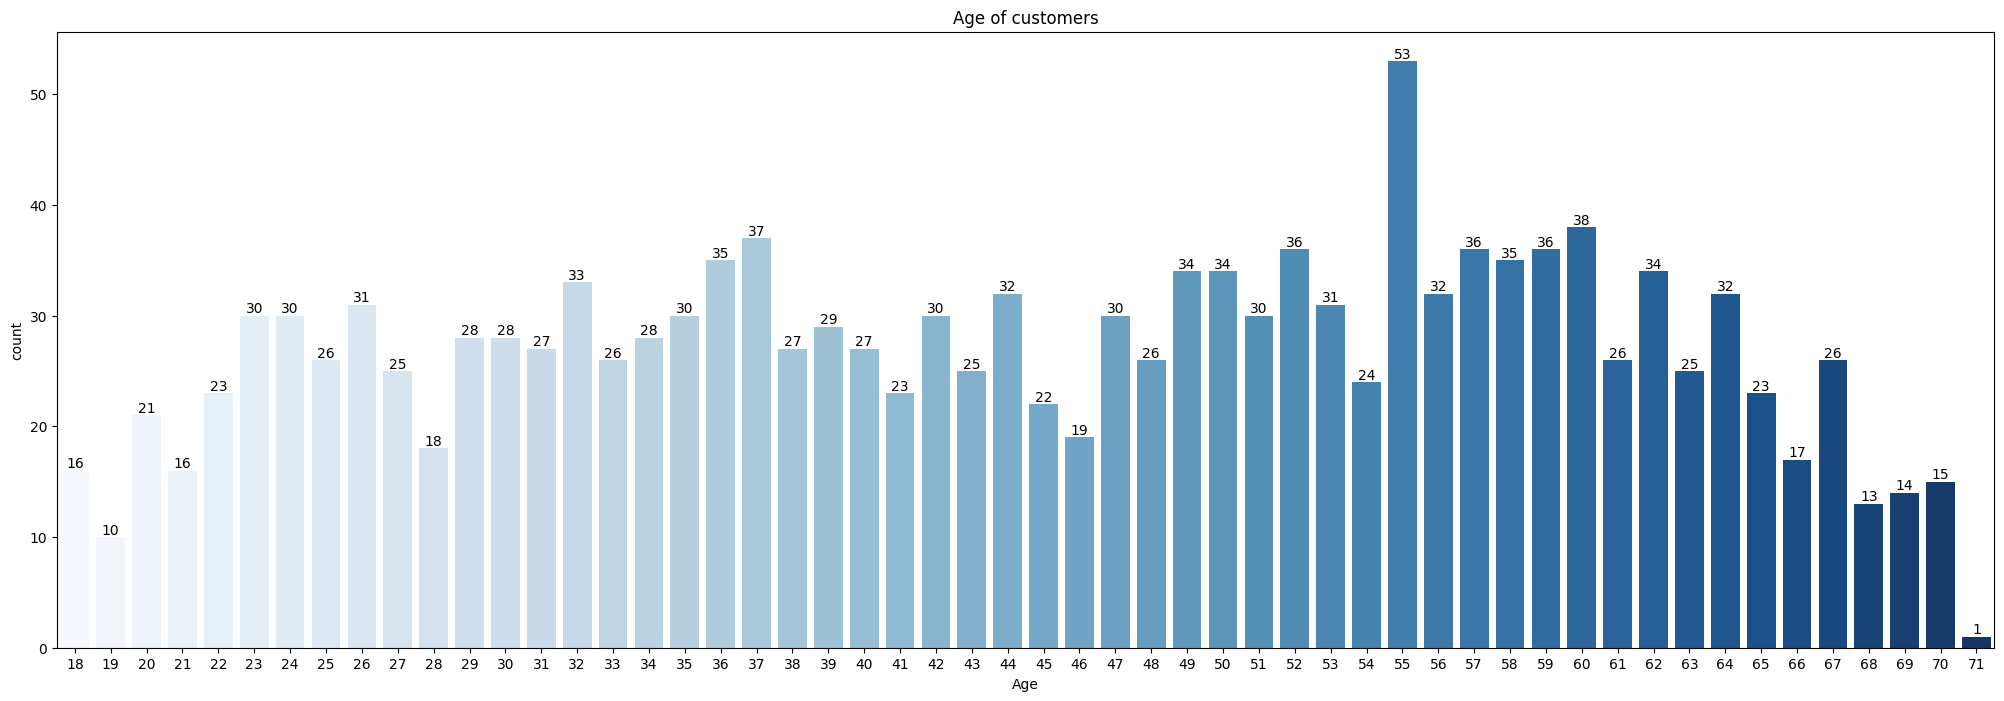

In [13]:
plt.rcParams['figure.figsize'] = (25, 8)
f = sns.countplot(x=mac['Age'],palette = 'Blues')
f.bar_label(f.containers[0])
plt.title('Age of customers')
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
def label(x):
    mac[x] = LabelEncoder().fit_transform(mac[x])
    return mac

category = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in category:
    label(i)
mac

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


In [15]:
mcd = mac.loc[:,category]
mcd

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [16]:
x = mac.loc[:,category].values
print(x)

[[0 1 0 ... 1 0 0]
 [1 1 0 ... 1 0 0]
 [0 1 1 ... 1 1 0]
 ...
 [1 1 0 ... 1 0 0]
 [1 1 0 ... 0 1 0]
 [0 1 0 ... 1 0 1]]


In [17]:
from sklearn import preprocessing
pca_data = preprocessing.scale(x)

pca = PCA(n_components=11)
pc = pca.fit_transform(x)
names = ['A','B','C','D','E','F','G','H','I','J','K']
pf = pd.DataFrame(data = pc, columns = names)
pf

,A,B,C,D,E,F,G,H,I,J,K
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [18]:
pca.explained_variance_ratio_

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [19]:
np.cumsum(pca.explained_variance_ratio_)

array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

In [20]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = [chr(i) for i in range(ord('A'),ord('K')+1)]
loadings_mac = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_mac['variable'] = mcd.columns.values
loadings_mac = loadings_mac.set_index('variable')
loadings_mac

,A,B,C,D,E,F,G,H,I,J,K
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


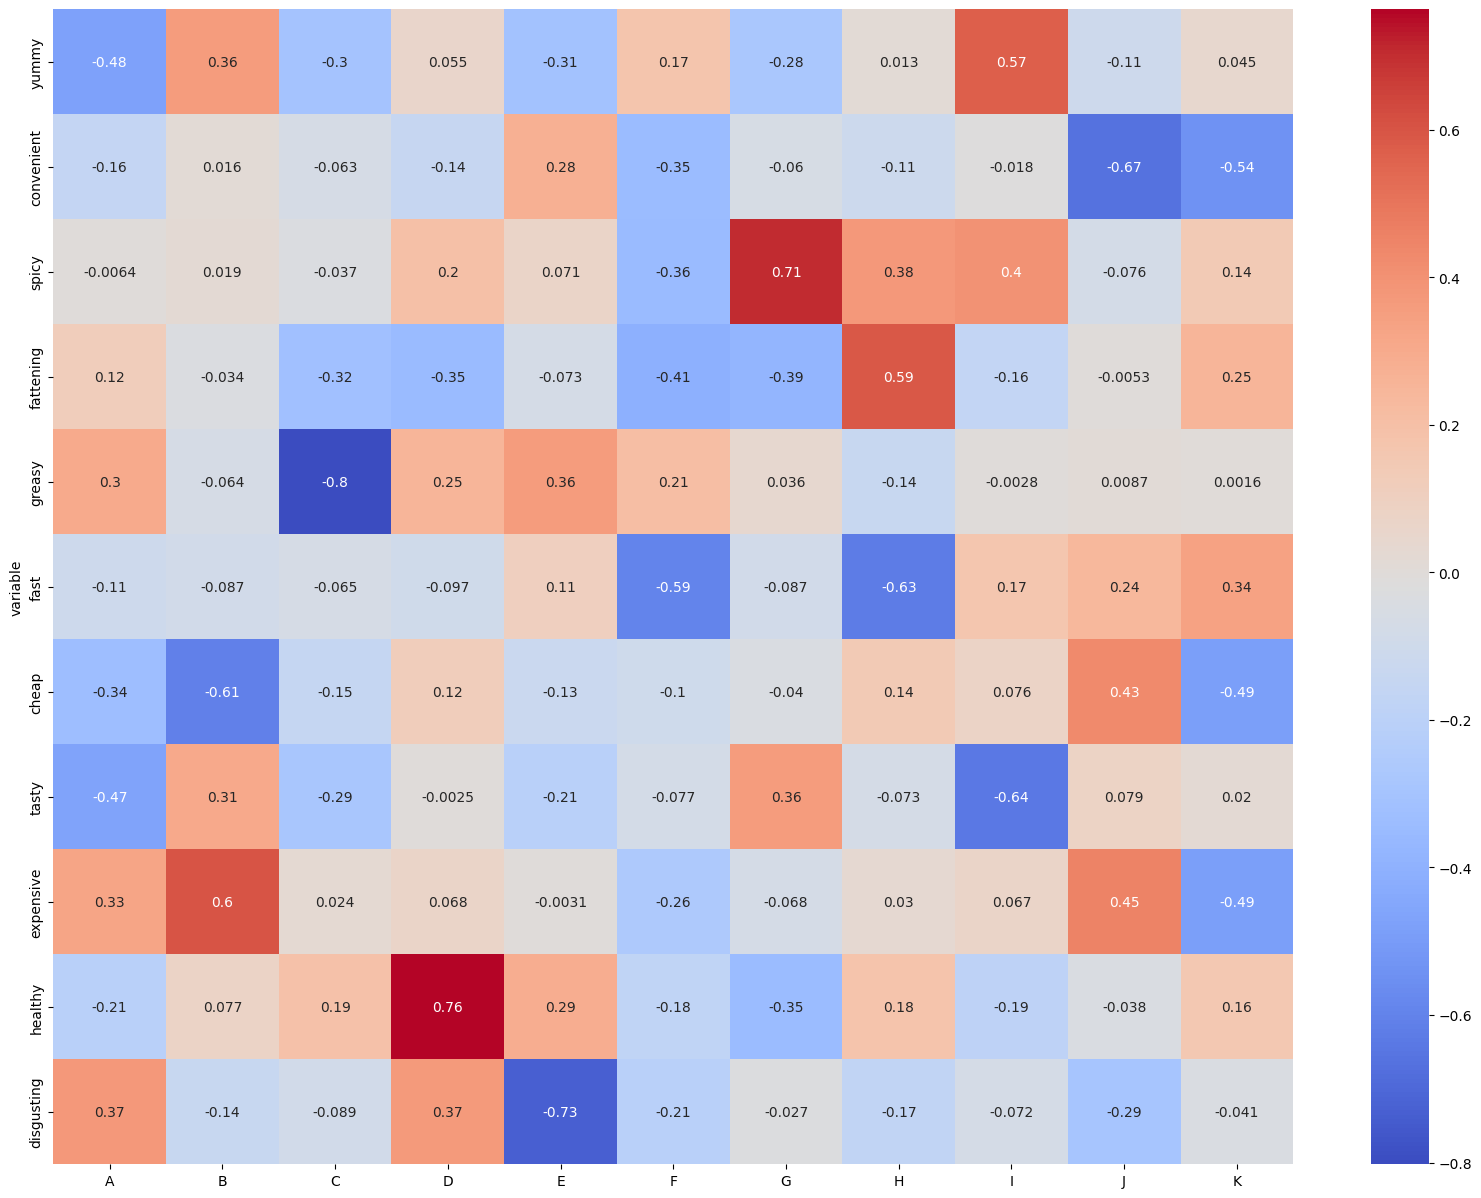

In [21]:
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_mac, annot=True, cmap='coolwarm')
plt.show()

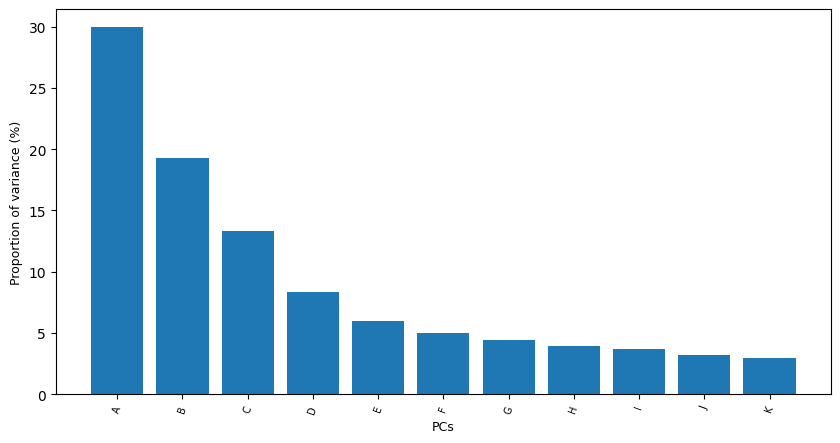

In [22]:
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(10,5))

In [23]:
std_dev = []
for i in names:
    std_dev.append(np.std(pf[i]))

print("Standard Deviation")
np.array(std_dev)

Standard Deviation


array([0.75678896, 0.60724649, 0.50444578, 0.39866134, 0.33728888,
       0.31016782, 0.28959761, 0.27502727, 0.2651598 , 0.24875617,
       0.23682131])

In [24]:
cp = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Proportion")
cp

Cumulative Proportion


array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

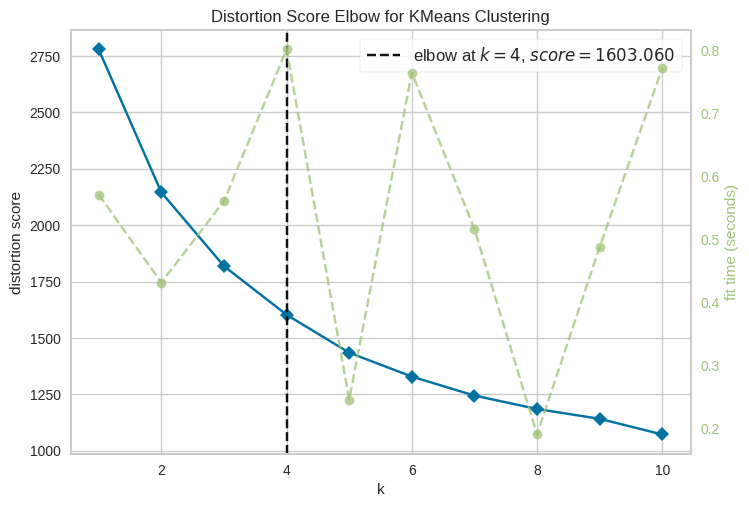

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11)).fit(mcd)
visualizer.show()

In [26]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(mcd)
mac['cluster_num'] = kmeans.labels_
print ("kmeans.labels_",kmeans.labels_) 
print ("kmeans.inertia_",kmeans.inertia_)  
print("kmeans.n_iter_",kmeans.n_iter_) 

kmeans.labels_ [1 0 2 ... 2 0 2]
kmeans.inertia_ 1841.5644522994094
kmeans.n_iter_ 6


In [27]:
print("kmeans.cluster_centers_",kmeans.cluster_centers_)

kmeans.cluster_centers_ [[0.8998358  0.9819376  0.10344828 0.8045977  0.37110016 0.96387521
  0.91461412 0.98357964 0.05254516 0.32676519 0.05582923]
 [0.02046784 0.85964912 0.07017544 0.91520468 0.66081871 0.93274854
  0.86549708 0.1374269  0.04678363 0.07017544 0.43274854]
 [0.4940239  0.85059761 0.09760956 0.91035857 0.62350598 0.80079681
  0.03386454 0.57768924 0.94023904 0.1314741  0.34063745]]


In [28]:
from collections import Counter
Counter(kmeans.labels_)

Counter({1: 342, 0: 609, 2: 502})

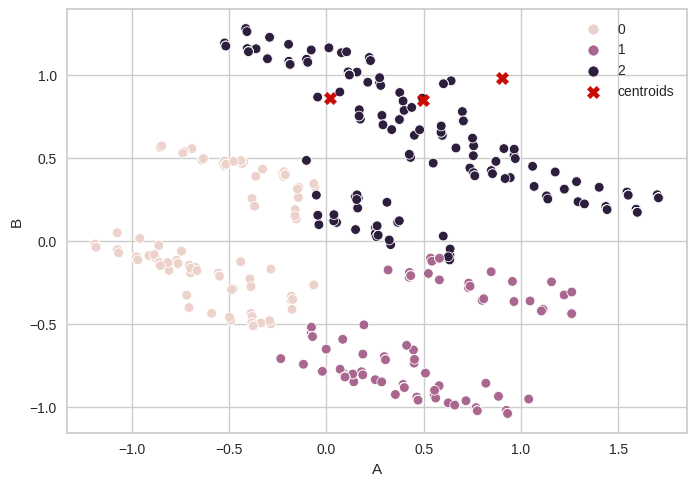

In [29]:
sns.scatterplot(data=pf, x="A", y="B", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [30]:
mcd_data2=pd.get_dummies(mac, prefix=['cluster_num'], columns=['cluster_num'])
mcd_data2.head(4)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num_0,cluster_num_1,cluster_num_2
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,0,1,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,0,0,1
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,1,0,0


In [31]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(mac['cluster_num'],mac['Like'])
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab 

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,4,4,2,6,12,43,69,95,147,118,109
1,72,40,40,31,26,55,32,32,12,2,0
2,76,27,31,22,20,71,51,60,70,40,34


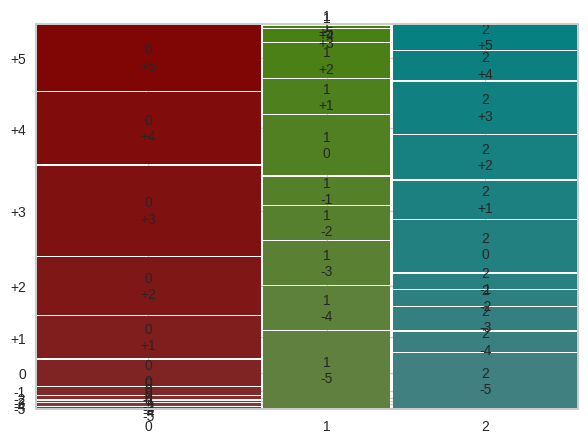

In [32]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

In [33]:
crosstab_gender =pd.crosstab(mac['cluster_num'],mac['Gender'].replace({1: 'Male', 0: 'Female'}))
crosstab_gender

Gender,Female,Male
cluster_num,,
0,362,247
1,197,145
2,229,273


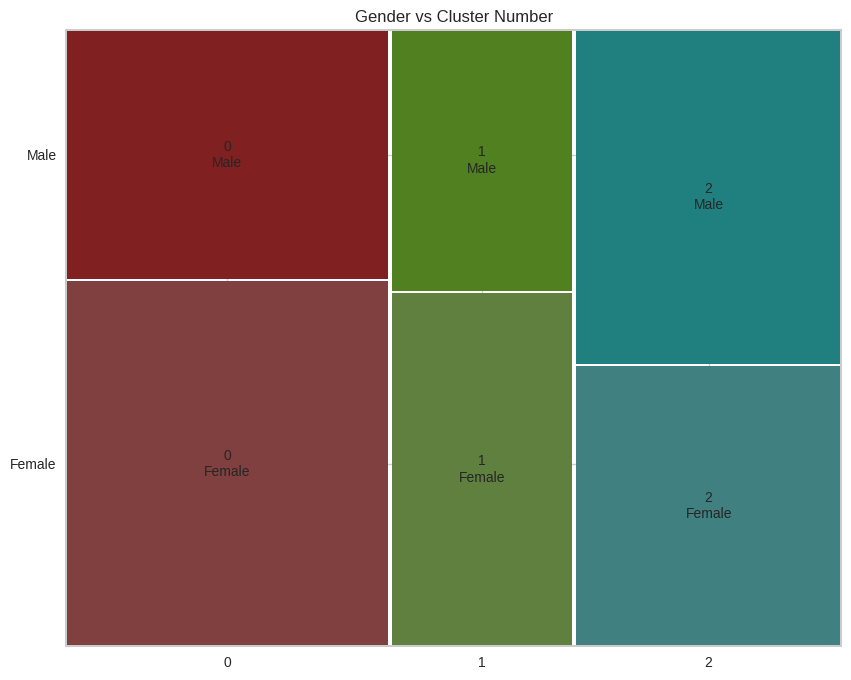

In [34]:
plt.rcParams['figure.figsize'] = (7,5)
fig, ax = plt.subplots(figsize=(10, 8))
mosaic(crosstab_gender.stack(), ax=ax, title='Gender vs Cluster Number')
plt.show()

In [35]:
mac['VisitFrequency'] = LabelEncoder().fit_transform(mac['VisitFrequency'])
visit = mac.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.582923
1,1,2.830409
2,2,2.573705


In [36]:
mac['Like'] = LabelEncoder().fit_transform(mac['Like'])
Like = mac.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,2.934319
1,1,6.362573
2,2,5.009960


In [37]:
mac['Gender'] = LabelEncoder().fit_transform(mac['Gender'])
Gender = mac.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.405583
1,1,0.423977
2,2,0.543825


In [38]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.405583,2.934319,2.582923
1,1,0.423977,6.362573,2.830409
2,2,0.543825,5.009960,2.573705


In [39]:
scaled_mac = scalar.fit_transform(mac1)

pca = PCA(n_components=11)
principal_components = pca.fit_transform(scaled_mac)
pca_mac = pd.DataFrame(data=principal_components ,columns=["A","B","C","D","E","F","G","H","I","J","K"])
pca_mac.head()

,A,B,C,D,E,F,G,H,I,J,K
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144


<Axes: xlabel='A', ylabel='B'>

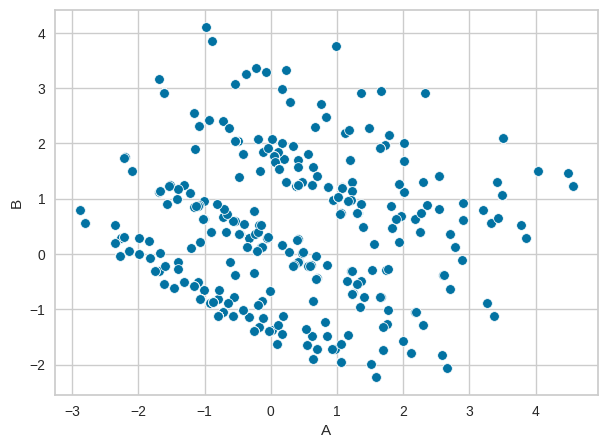

In [40]:
sns.scatterplot(data=pca_mac, x="A", y="B")

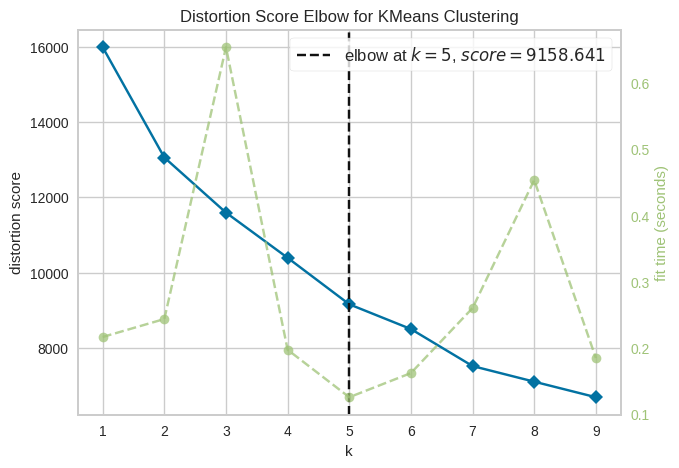

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(scaled_mac)       
visualizer.show()

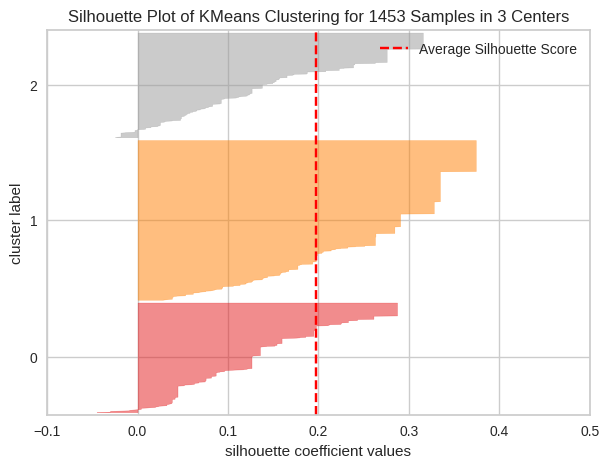

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1453 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [42]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(3)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(scaled_mac)
visualizer.show()

In [43]:
kmeans_model=KMeans(3)
kmeans_model.fit_predict(scaled_mac)
pca_mac_kmeans= pd.concat([pca_mac,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
pca_mac_kmeans.head()

,A,B,C,D,E,F,G,H,I,J,K,cluster
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170,2
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681,1
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530,1
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201,1
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144,2


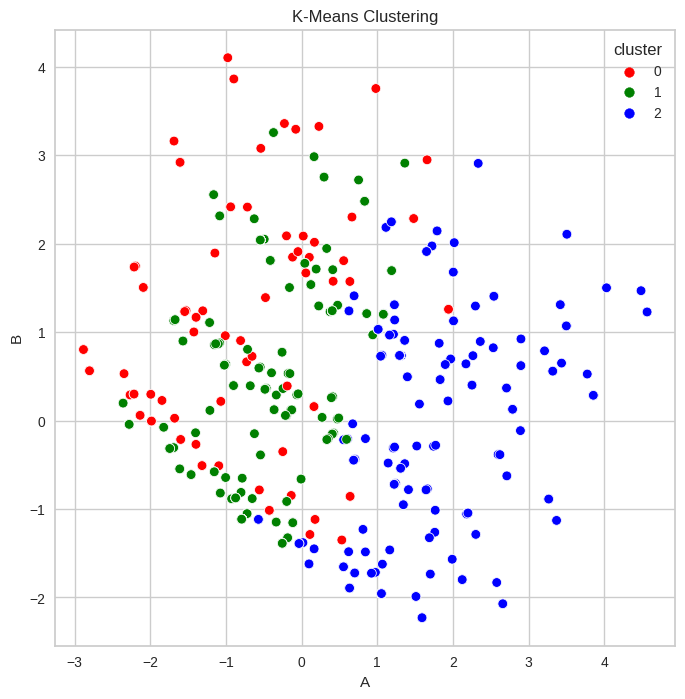

In [44]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="A",y="B",hue="cluster",data=pca_mac_kmeans,palette=['red','green','blue'])
plt.title("K-Means Clustering")
plt.show()

In [45]:
kmeans_model=KMeans(3)
kmeans_model.fit_predict(scaled_mac)
pca_mac_kmeans1= pd.concat([mac1,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
pca_mac_kmeans1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
0,0,1,0,1,0,1,1,0,1,0,0,0
1,1,1,0,1,1,1,1,1,1,0,0,0
2,0,1,1,1,1,1,0,1,1,1,0,2
3,1,1,0,1,1,1,1,1,0,0,1,0
4,0,1,0,1,1,1,1,0,0,1,0,0


<Axes: xlabel='cluster', ylabel='count'>

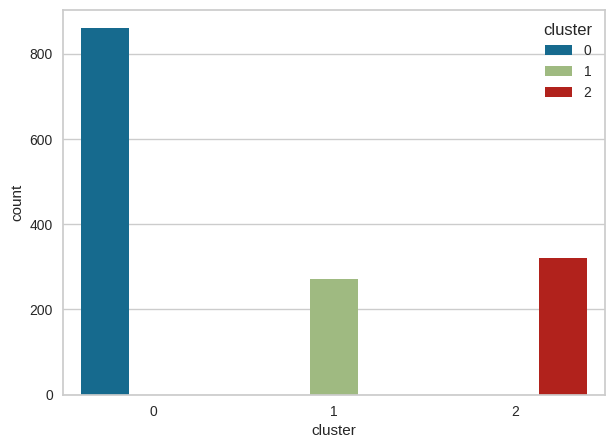

In [46]:
sns.countplot(x ='cluster', data = pca_mac_kmeans1,hue = "cluster")

In [47]:
cluster_1_mac = pca_mac_kmeans1[pca_mac_kmeans1["cluster"]==0]
cluster_1_mac.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
0,0,1,0,1,0,1,1,0,1,0,0,0
1,1,1,0,1,1,1,1,1,1,0,0,0
3,1,1,0,1,1,1,1,1,0,0,1,0
4,0,1,0,1,1,1,1,0,0,1,0,0
5,1,1,0,1,0,1,1,1,0,0,0,0


In [48]:
cluster_2_mac = pca_mac_kmeans1[pca_mac_kmeans1["cluster"]==1]
cluster_2_mac.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
8,0,0,0,1,1,0,0,0,1,0,1,1
18,0,0,0,1,1,1,1,0,1,0,1,1
38,0,0,0,1,1,1,1,0,0,0,1,1
39,0,0,0,1,1,1,0,0,1,0,1,1
40,1,0,0,1,0,0,0,1,1,0,0,1


In [49]:
cluster_3_mac = pca_mac_kmeans1[pca_mac_kmeans1["cluster"]==2]
cluster_3_mac.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
2,0,1,1,1,1,1,0,1,1,1,0,2
6,1,1,1,1,0,1,0,1,1,1,0,2
13,1,1,0,1,0,1,0,1,1,1,0,2
17,1,1,0,0,1,1,0,1,0,0,0,2
24,1,1,0,1,0,1,1,1,0,1,0,2


In [50]:
mac_new= pd.concat([mac,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
mac_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num,cluster
0,0,1,0,1,0,1,1,0,1,0,0,7,61,0,0,1,0
1,1,1,0,1,1,1,1,1,1,0,0,1,51,0,0,0,0
2,0,1,1,1,1,1,0,1,1,1,0,0,62,0,0,2,2
3,1,1,0,1,1,1,1,1,0,0,1,3,69,4,0,0,0
4,0,1,0,1,1,1,1,0,0,1,0,1,49,3,1,1,0


In [51]:
mac_new['VisitFrequency'].value_counts()

3    439
0    342
5    252
4    235
2    131
1     54
Name: VisitFrequency, dtype: int64

In [52]:
mac_new["VisitFrequency"]= mac_new["VisitFrequency"].replace({'Never':0, 'Once a year':1, 'Every three months':2, 'Once a month':3, 'Once a week':4, 'More than once a week':5})
mac_new['Like'].value_counts()

2     229
1     187
10    169
3     160
0     152
9     152
4     143
7      73
8      71
6      59
5      58
Name: Like, dtype: int64

In [53]:
mac_new['Gender'].value_counts()

0    788
1    665
Name: Gender, dtype: int64

In [54]:
mac_new["Like"]= mac_new["Like"].replace({'I hate it!-5':0, '-4':1, '-3':2, '-2':3, '-1':4, '0':5, '+1':6, '+2':7, '+3':8, '+4':9, 'I love it!+5':10})
mac_new["Gender"]= mac_new["Gender"].replace({'Female':0, 'Male':1})
mac_new

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num,cluster
0,0,1,0,1,0,1,1,0,1,0,0,7,61,0,0,1,0
1,1,1,0,1,1,1,1,1,1,0,0,1,51,0,0,0,0
2,0,1,1,1,1,1,0,1,1,1,0,0,62,0,0,2,2
3,1,1,0,1,1,1,1,1,0,0,1,3,69,4,0,0,0
4,0,1,0,1,1,1,1,0,0,1,0,1,49,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,9,47,5,1,2,1
1449,1,1,0,1,0,0,1,1,0,1,0,1,36,4,0,0,2
1450,1,1,0,1,0,1,0,1,1,0,0,2,52,3,0,2,0
1451,1,1,0,0,0,1,1,1,0,1,0,3,41,0,1,0,2


In [55]:
X = mac_new.drop(['cluster'],axis=1)
y= mac_new[['cluster']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)
X_test.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num
1435,0,1,0,1,1,1,1,0,0,0,1,9,25,2,1,1
180,0,1,0,1,1,1,0,1,1,0,1,6,25,3,1,2
1411,1,1,0,1,1,1,1,1,0,0,0,1,55,5,0,0
1427,0,1,0,1,0,1,0,0,1,1,0,2,38,3,0,2
572,0,1,0,1,0,1,0,1,1,0,0,10,60,0,1,2


In [56]:
y_test.head(5)

,cluster
1435,0
180,1
1411,0
1427,2
572,0


In [57]:
model= DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[250   5   1]
 [  2  74   1]
 [  2   0 101]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       256
           1       0.94      0.96      0.95        77
           2       0.98      0.98      0.98       103

    accuracy                           0.97       436
   macro avg       0.97      0.97      0.97       436
weighted avg       0.97      0.97      0.97       436



In [58]:
result = model.score(X_test, y_test)
print(result,'% Acuuracy')

0.9747706422018348 % Acuuracy
